In [ ]:
#load Library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn import tree

In [ ]:
cancer = datasets.load_breast_cancer()
cancer.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:

df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
np.sum(pd.isnull(df).sum())

0

In [ ]:
df['cancer'] = pd.DataFrame(cancer['target'])
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


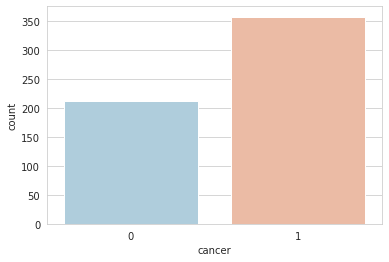

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x=df['cancer'],data=df,palette='RdBu_r')

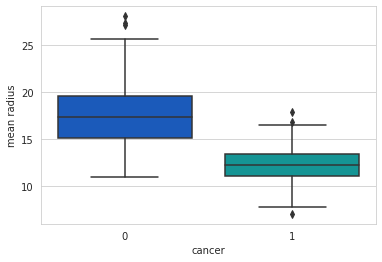

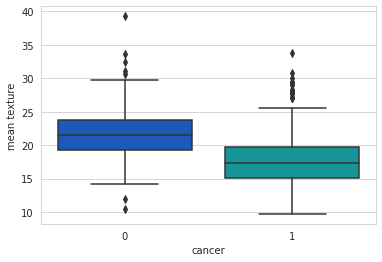

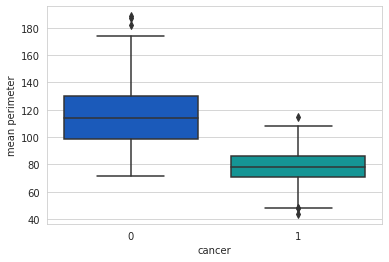

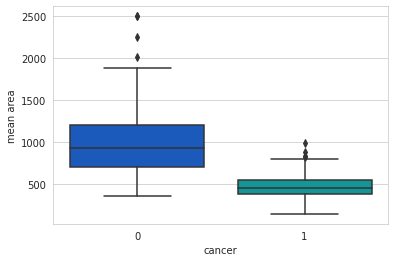

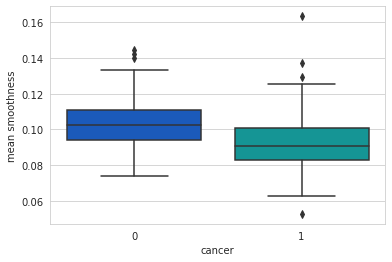

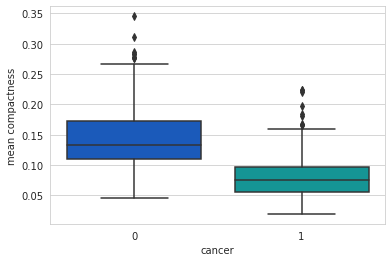

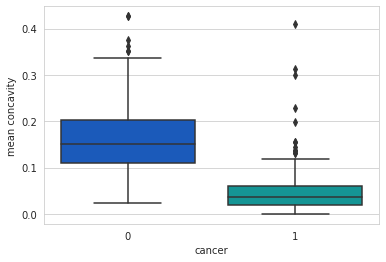

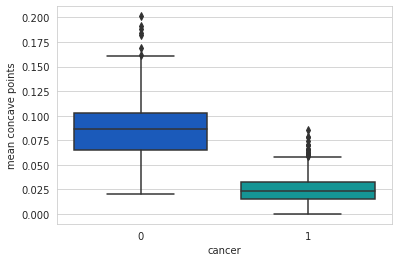

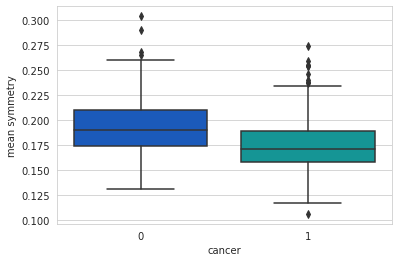

<Figure size 432x288 with 0 Axes>

In [ ]:
l=list(df.columns[0:10])
for i in range(len(l)-1):
    sns.boxplot(x='cancer',y=l[i], data=df, palette='winter')
    plt.figure()

Text(0.5, 1.0, 'Kanker menurut nilai atribut: mean smoothness')

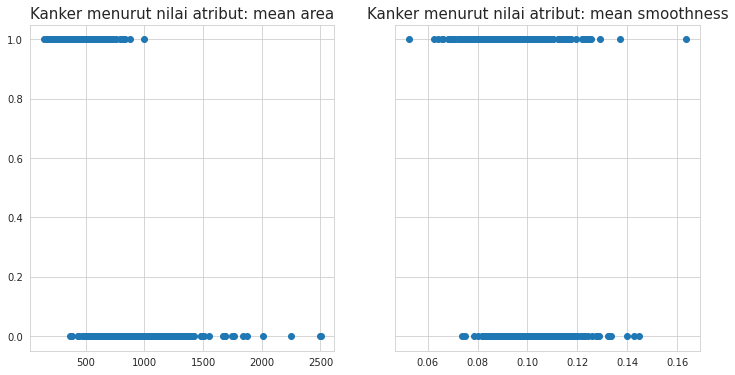

In [ ]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(df['mean area'],df['cancer'])
ax1.set_title("Kanker menurut nilai atribut: mean area", fontsize=15)
ax2.scatter(df['mean smoothness'],df['cancer'])
ax2.set_title("Kanker menurut nilai atribut: mean smoothness", fontsize=15)

Text(0.5, 1.0, 'Sehat')

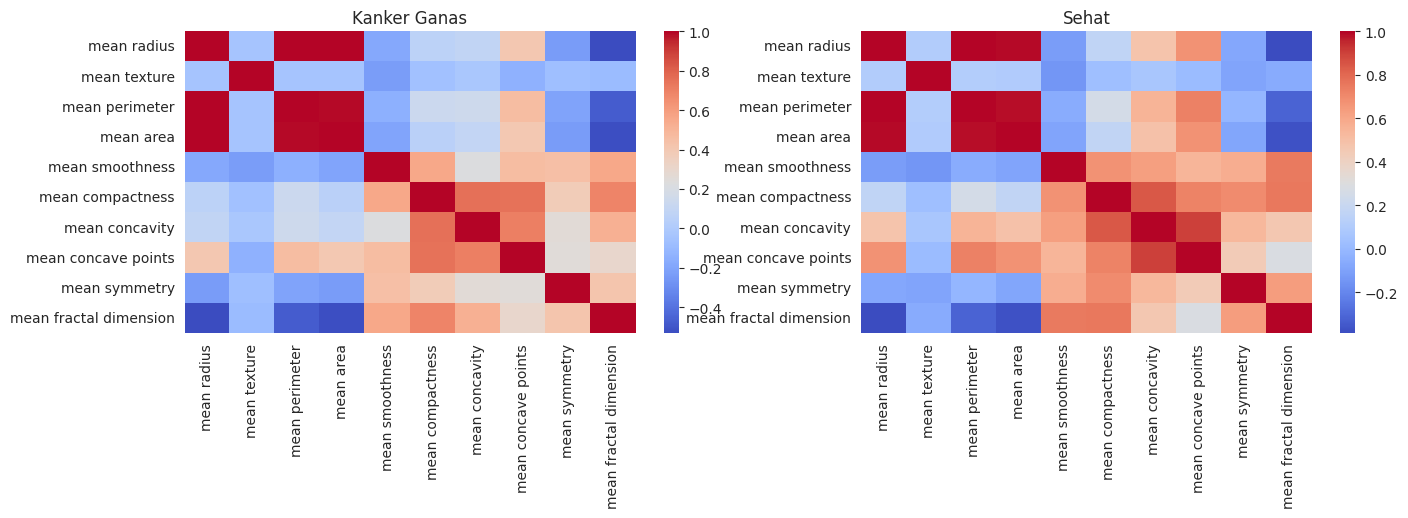

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(df[df['cancer']==1][['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Kanker Ganas')
ax = sns.heatmap(df[df['cancer']==0][['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Sehat')

In [ ]:
# Kita akan membuat 2 DataFrame:  
# df_feat yang khusus hanya akan berisi nilai-nilai atribut/fitur/variabel saja.
# dan 
# df_target yang khusus hanya akan berisi label/kelas/target 
df_feat = df.drop('cancer',axis=1) 
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_target = df['cancer']
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: cancer, dtype: int64

In [108]:
# Proporsi yang digunakan adalah 70% untuk training dan 30% untuk testing secara acak.
# Karena pembagian dilakukan secara acak, maka, kita tambahkan parameter random_state agar pengacakan ini bisa direplikasi kemudian hari
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.3, random_state=0)
X_train.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,0.2034,1.1660,1.567,14.340,0.004957,0.021140,0.04156,0.008038,0.01843,0.003614,12.40,21.90,82.04,467.6,0.1352,0.2010,0.25960,0.07431,0.2941,0.09180
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,0.1485,1.5630,1.035,10.080,0.008875,0.009362,0.01808,0.009199,0.01791,0.003317,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,0.2200,0.9823,1.484,16.510,0.005518,0.015620,0.01994,0.007924,0.01799,0.002484,13.59,25.22,86.60,564.2,0.1217,0.1788,0.19430,0.08211,0.3113,0.08132
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,0.2577,0.4757,1.817,28.920,0.002866,0.009181,0.01412,0.006719,0.01069,0.001087,21.31,26.36,139.20,1410.0,0.1234,0.2445,0.35380,0.15710,0.3206,0.06938
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.00000,0.000000,0.02659,0.004100,7.93,19.54,50.41,185.2,0.1584,0.1202,0.00000,0.00000,0.2932,0.09382


In [ ]:
#ada_boost
ada_booster = AdaBoostClassifier(learning_rate=0.1)
ada_booster.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
model_ada = ada_booster
model_ada.fit(X_train,y_train)
print(classification_report(y_test,ada_booster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



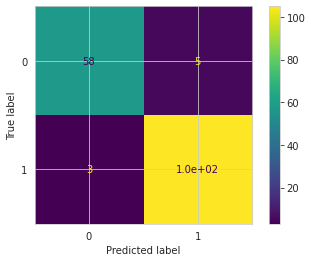

In [ ]:
ada_predictions = model_ada.predict(X_test)

cm = confusion_matrix(y_test, ada_predictions, labels=model_ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_ada.classes_)
disp.plot()
plt.show()

In [ ]:
#gradient_boost
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
model_grad = gradient_booster
model_grad.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



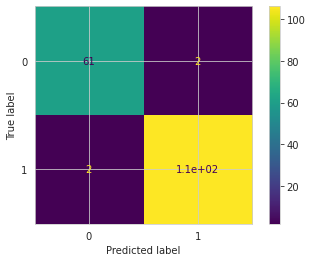

In [ ]:
grad_predictions = model_grad.predict(X_test)

cm = confusion_matrix(y_test, grad_predictions, labels=model_grad.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_grad.classes_)
disp.plot()
plt.show()